In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make dataset

In [2]:
from parallel_vae.utils.toy_dataset_maker import ToyDatasetMaker

In [11]:
maker = ToyDatasetMaker(10, 10, 1.6, 0.05, 0.25, 60)

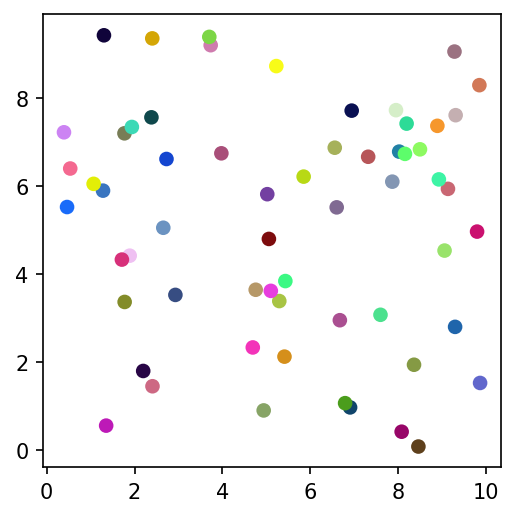

In [12]:
plt.figure(dpi=150)
points = maker._centers
colors = maker._colors
plt.scatter(points[:, 0], points[:, 1], c=colors / 255)
plt.gca().set_aspect("equal")

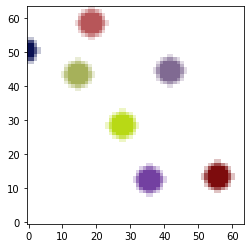

In [13]:
image = maker.get_image(np.array([6, 6, -np.pi / 2]))
plt.imshow(image, origin="low")

In [6]:
trajectory = maker.snail_trajectory(0.05, 20)

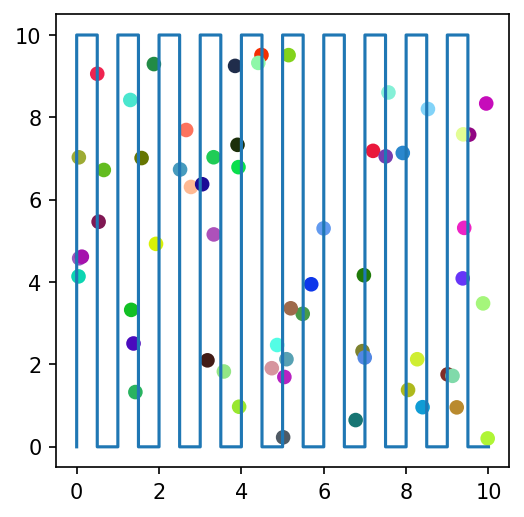

In [7]:
plt.figure(dpi=150)
points = maker._centers
colors = maker._colors
plt.scatter(points[:, 0], points[:, 1], c=colors / 255)
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.gca().set_aspect("equal")

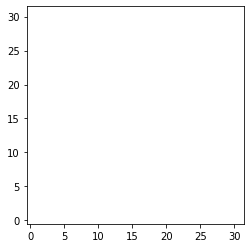

In [8]:
image = maker.get_image(trajectory[50])
plt.imshow(image, origin="low")

In [9]:
len(trajectory)

4240

In [10]:
maker.save_dataset("dataset.npz", 0.05, 20)